### Student Activity: Portfolio Planner Part 2

This program is part 2 of a two-part student activity and continues the following:

`PART I: Portfolio Optimization via Risk Evaluation`

Reads in the CSV datasets of 10 stocks, calculates the volatility of each stock, drops the top-five highly volatile stocks, sets allocations for the remaining stocks based on risk/volatility, and calculates the returns of a hypothetical `$10,000` investment for the constructed portfolio.

`PART II: Portfolio Optimization via Correlation and Return-to-Risk (Sharpe Ratio) Evaluations`

Alternatively filters the same 10 stocks (from part 1) down to only minimally-correlated stocks with higher sharpe ratios, and calculates the returns of a hypothetical `$10,000` investment for the constructed optimized portfolio. Returns of the optimized portfolio are then compared to lesser-optimized portfolios.

---

### PART 1: Portfolio Optimization via Risk Evaluation

In [1]:
# Import libraries and dependencies
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from glob import glob

### Read CSVs as DataFrames 

In [2]:
def combine(directory):
    df_list = []
    for path in glob(directory + "/*csv"):
        df = pd.read_csv(path, 
                         parse_dates=True, 
                         index_col='date', 
                         names=['date', path.split('/')[-1].split('.')[0].split('_')[0].upper()], 
                         header=0)
        df_list.append(df)
    return pd.concat(df_list, axis='columns', join='inner').sort_index()
combined = combine("../Resources")
combined.head()

,WRK,MU,SBUX,FANG,JNJ,WDC,T,BK,LUV,NKE
date,,,,,,,,,,
2015-06-24,58.5699,24.06,53.710,77.96,99.33,87.73,35.78,43.29,34.35,53.110
2015-06-25,57.2022,24.02,54.070,76.39,99.12,85.95,36.18,42.85,34.49,52.610
2015-06-26,57.2022,19.66,54.620,75.25,99.64,84.45,36.12,42.98,34.32,54.855
2015-06-29,56.1857,18.73,53.550,75.16,97.68,81.96,35.77,41.79,33.18,53.835
2015-06-30,56.2781,18.84,53.615,75.38,97.46,78.42,35.52,41.97,33.09,54.010


### Calculate Daily Returns

In [3]:
# Use the `pct_change` function to calculate daily returns
original_returns = combined.pct_change().dropna()

### Evaluate Riskiness of Stocks

In [4]:
# Use the `std` function and multiply by the square root of the number of trading days in a year to get annualized volatility
standard_deviation = original_returns.std().sort_values(ascending=False) * np.sqrt(252)
standard_deviation

MU      0.479955
WDC     0.415605
FANG    0.370704
WRK     0.303601
LUV     0.280021
NKE     0.246045
BK      0.224967
SBUX    0.206805
T       0.187579
JNJ     0.161128
dtype: float64

### Drop High Volatility Stocks

In [5]:
# Drop the five stocks with the highest volatility in daily returns
low_volitility_returns = original_returns.drop(columns=standard_deviation.index[:5])
low_volitility_returns.head()

,SBUX,JNJ,T,BK,NKE
date,,,,,
2015-06-25,0.006703,-0.002114,0.011179,-0.010164,-0.009414
2015-06-26,0.010172,0.005246,-0.001658,0.003034,0.042672
2015-06-29,-0.019590,-0.019671,-0.009690,-0.027687,-0.018594
2015-06-30,0.001214,-0.002252,-0.006989,0.004307,0.003251
2015-07-01,0.005129,0.010363,0.001408,0.005004,0.013053


### Set Portfolio Allocations/Weights and Calculate Portfolio Daily Returns

In [6]:
# Set weights for corresponding risk profile of stocks, use the `dot` function to sum the product each weight and the corresponding stock daily return
# BK, LUV, NKE, SBUX, T
weights = [0.2, 0.2, 0.2, 0.2, 0.2]
low_volitility_portfolio_returns = low_volitility_returns.dot(weights)
low_volitility_portfolio_returns.head()

date
2015-06-25   -0.000762
2015-06-26    0.011893
2015-06-29   -0.019046
2015-06-30   -0.000094
2015-07-01    0.006991
dtype: float64

### Calculate Cumulative Returns

In [7]:
# Use the `cumprod` function to calculate cumulative returns
cumulative_returns = (1 + low_volitility_portfolio_returns).cumprod()
cumulative_returns.head()

date
2015-06-25    0.999238
2015-06-26    1.011122
2015-06-29    0.991864
2015-06-30    0.991771
2015-07-01    0.998704
dtype: float64

### Plot Return of Portfolio Starting with Initial Investment of `$10,000`

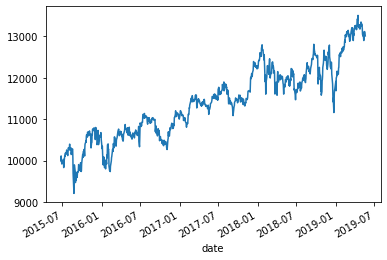

In [8]:
# Plot the returns of the portfolio in terms of money
(10000 * cumulative_returns).plot()

### PART 2: Portfolio Optimization via Correlation and Return-to-risk (sharpe ratio) Evaluations

### Evaluate Correlation of Stock Returns

In [9]:
# Use the `corr` function to calculate the correlation between stock returns
correlation = original_returns.corr()
correlation.head()

,WRK,MU,SBUX,FANG,JNJ,WDC,T,BK,LUV,NKE
WRK,1.000000,0.405658,0.303981,0.294395,0.295180,0.397666,0.281383,0.473280,0.294395,0.271221
MU,0.405658,1.000000,0.247012,0.257745,0.173480,0.609577,0.174143,0.339511,0.296751,0.196334
SBUX,0.303981,0.247012,1.000000,0.211182,0.366453,0.281220,0.238597,0.361186,0.314467,0.398614
FANG,0.294395,0.257745,0.211182,1.000000,0.221352,0.259662,0.186524,0.316856,0.169883,0.228170
JNJ,0.295180,0.173480,0.366453,0.221352,1.000000,0.223365,0.343575,0.350064,0.248263,0.297197


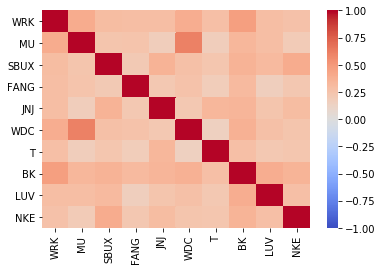

In [10]:
# Use the `heatmap` function from the Seaborn library to visualize the correlation table
sns.heatmap(correlation, vmin=-1, vmax=1, cmap='coolwarm')

### Drop the Two Most Consistently Correlated Stocks

In [11]:
correlation_mean = correlation.mean().sort_values(ascending=False)
correlation_mean

BK      0.424213
WRK     0.401716
WDC     0.381491
SBUX    0.372271
MU      0.370021
JNJ     0.351893
NKE     0.351271
LUV     0.349486
FANG    0.314577
T       0.312318
dtype: float64

In [12]:
# Drop highly correlated stocks and keep only the non-correlated stocks
non_correlation_returns = original_returns.drop(columns=correlation_mean.index[:2])
non_correlation_returns.head()

,MU,SBUX,FANG,JNJ,WDC,T,LUV,NKE
date,,,,,,,,
2015-06-25,-0.001663,0.006703,-0.020139,-0.002114,-0.020290,0.011179,0.004076,-0.009414
2015-06-26,-0.181515,0.010172,-0.014923,0.005246,-0.017452,-0.001658,-0.004929,0.042672
2015-06-29,-0.047304,-0.019590,-0.001196,-0.019671,-0.029485,-0.009690,-0.033217,-0.018594
2015-06-30,0.005873,0.001214,0.002927,-0.002252,-0.043192,-0.006989,-0.002712,0.003251
2015-07-01,-0.003185,0.005129,-0.033961,0.010363,0.013007,0.001408,-0.014204,0.013053


### Evaluate Reward-to-Risk (Sharpe Ratio) of Minimally-Correlated Stocks

In [13]:
# Use the `mean` and `std` functions to calculate the annualized sharpe ratio
sharpe_ratios = (non_correlation_returns.mean() * np.sqrt(252) / non_correlation_returns.std()).sort_values()
sharpe_ratios

WDC    -0.245731
T      -0.050216
FANG    0.421266
MU      0.435027
LUV     0.520850
SBUX    0.545402
NKE     0.585923
JNJ     0.609743
dtype: float64

### Drop the Three Lowest Sharpe Ratio Stocks

In [14]:
# Drop the lowest sharpe ratio stocks and keep only the postive sharpe ratio stocks
optimized_returns = non_correlation_returns.drop(columns=sharpe_ratios.index[:3])
optimized_returns.head()

,MU,SBUX,JNJ,LUV,NKE
date,,,,,
2015-06-25,-0.001663,0.006703,-0.002114,0.004076,-0.009414
2015-06-26,-0.181515,0.010172,0.005246,-0.004929,0.042672
2015-06-29,-0.047304,-0.019590,-0.019671,-0.033217,-0.018594
2015-06-30,0.005873,0.001214,-0.002252,-0.002712,0.003251
2015-07-01,-0.003185,0.005129,0.010363,-0.014204,0.013053


### Overlay Hypothetical Portfolio Investments

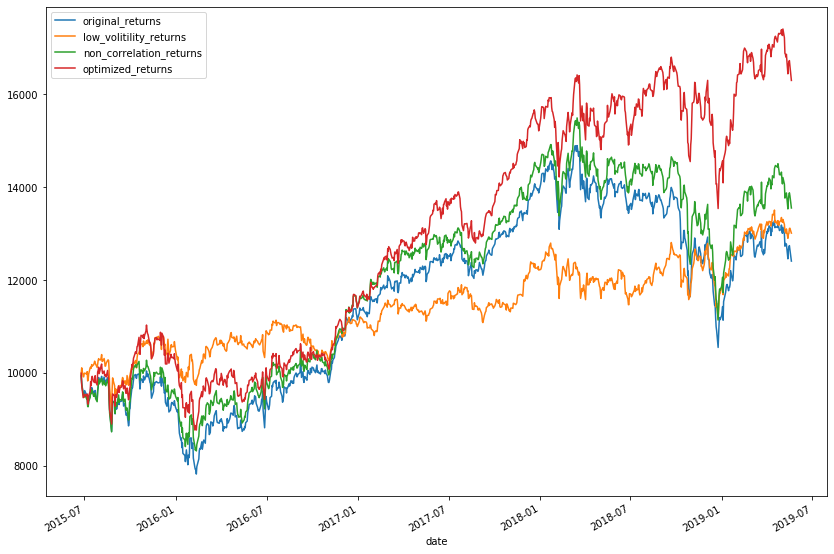

In [15]:
# Set the figure of the chart and plot each data trend on the single figure
df_dict = {'original_returns' : original_returns, 
           'low_volitility_returns' : low_volitility_returns, 
           'non_correlation_returns' : non_correlation_returns, 
           'optimized_returns': optimized_returns}

fig, ax = plt.subplots(figsize=(14, 10))

for k, v in df_dict.items():
    number_of_rows = v.shape[1]
    weights = [1/number_of_rows] * number_of_rows
    portfolio_return = v.dot(weights)
    cumulative_return = 10000 * (1 + portfolio_return).cumprod()
    cumulative_return.plot(ax=ax, label=k, legend=True)